<a href="https://colab.research.google.com/github/nandinigoel11/loan-status-prediction/blob/main/loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
copied_path = 'drive/My Drive/loan prediction.csv'
data = pd.read_csv(copied_path)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

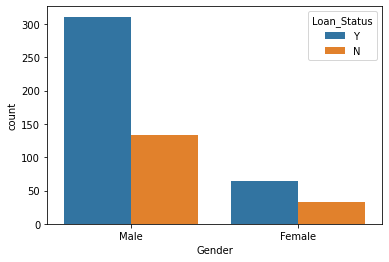

In [ ]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)
#This shows that male has more chances of getting the loan#

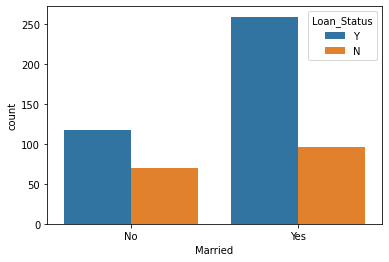

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=data)
#This shows that married person has more chances of getting the loan#

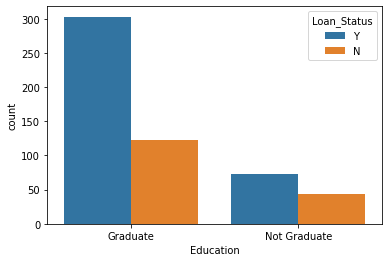

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=data)
#This shows that graduate has more chances of getting the loan#

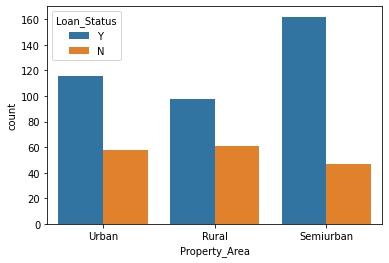

In [ ]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)
#This shows that people living in semiurban area has more chaances of getting the loan#

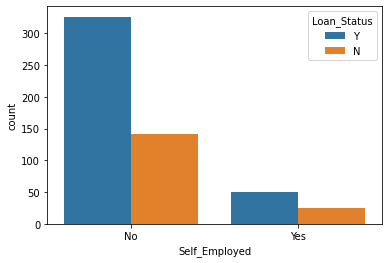

In [ ]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)
#This shows that not self employed people has more chances of getting the loan#

In [ ]:
status = pd.get_dummies(data['Gender'])
status = pd.get_dummies(data['Gender'],drop_first=True)
data=pd.concat([data,status],axis=1)
data.drop(['Gender'],axis=1,inplace=True)
data.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male
0,LP001002,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1


In [ ]:
status = pd.get_dummies(data['Education'])
status = pd.get_dummies(data['Education'],drop_first=True)
data=pd.concat([data,status],axis=1)
data.drop(['Education'],axis=1,inplace=True)
data.head()

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Not Graduate
0,LP001002,No,0,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0
1,LP001003,Yes,1,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,0
2,LP001005,Yes,0,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,0
3,LP001006,Yes,0,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1
4,LP001008,No,0,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0


In [ ]:
status = pd.get_dummies(data['Property_Area'])
data=pd.concat([data,status],axis=1)
data.drop(['Property_Area'],axis=1,inplace=True)
data.head()

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Rural,Semiurban,Urban
0,LP001002,No,0,No,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,1
1,LP001003,Yes,1,No,4583,1508.0,128.000000,360.0,1.0,N,1,0,1,0,0
2,LP001005,Yes,0,Yes,3000,0.0,66.000000,360.0,1.0,Y,1,0,0,0,1
3,LP001006,Yes,0,No,2583,2358.0,120.000000,360.0,1.0,Y,1,1,0,0,1
4,LP001008,No,0,No,6000,0.0,141.000000,360.0,1.0,Y,1,0,0,0,1


In [ ]:
status = pd.get_dummies(data['Married'])
status = pd.get_dummies(data['Married'],drop_first=True)
data=pd.concat([data,status],axis=1)
data.drop(['Married'],axis=1,inplace=True)
data.rename(columns = {'Yes':'Married'},inplace=True)
data.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Rural,Semiurban,Urban,Married
0,LP001002,0,No,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,1,0
1,LP001003,1,No,4583,1508.0,128.000000,360.0,1.0,N,1,0,1,0,0,1
2,LP001005,0,Yes,3000,0.0,66.000000,360.0,1.0,Y,1,0,0,0,1,1
3,LP001006,0,No,2583,2358.0,120.000000,360.0,1.0,Y,1,1,0,0,1,1
4,LP001008,0,No,6000,0.0,141.000000,360.0,1.0,Y,1,0,0,0,1,0


In [ ]:
status = pd.get_dummies(data['Self_Employed'])
status = pd.get_dummies(data['Self_Employed'],drop_first=True)
data=pd.concat([data,status],axis=1)
data.drop(['Self_Employed'],axis=1,inplace=True)
data.rename(columns={'Yes':'Self_Employed'},inplace=True)
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Rural,Semiurban,Urban,Married,Self_Employed
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,1,0,0
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,N,1,0,1,0,0,1,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,Y,1,0,0,0,1,1,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,Y,1,1,0,0,1,1,0
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,Y,1,0,0,0,1,0,0


In [ ]:
status = pd.get_dummies(data['Loan_Status'])
status = pd.get_dummies(data['Loan_Status'],drop_first=True)
data=pd.concat([data,status],axis=1)
data.drop(['Loan_Status'],axis=1,inplace=True)
data.rename(columns={'Y':'Loan_Status'},inplace=True)
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Not Graduate,Rural,Semiurban,Urban,Married,Self_Employed,Loan_Status
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,1,0,0,1
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,1,0,1,0,0,1,0,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,1,0,0,0,1,1,1,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,1,1,0,1
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,1,0,0,1


In [ ]:
data['Dependents']=data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Not Graduate,Rural,Semiurban,Urban,Married,Self_Employed,Loan_Status
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,1,0,0,1
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,1,0,1,0,0,1,0,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,1,0,0,0,1,1,1,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,1,1,0,1
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,1,0,0,1


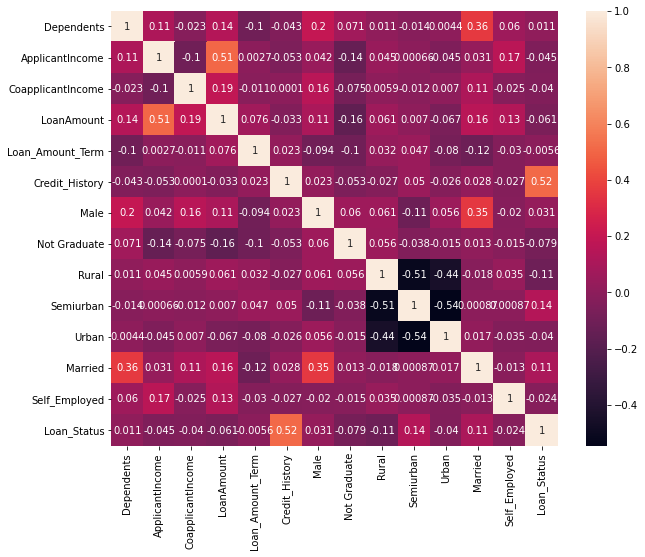

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
X = data.iloc[1:542,1:12].values
y = data.iloc[1:542,12].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(y_pred,y_test))

Logistic Regression accuracy =  0.803680981595092


In [ ]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)
print(chi_scores)

(array([9.46597128e+01, 2.99283468e+03, 2.75508309e+04, 6.20987675e+02,
       8.96683033e+01, 6.21175048e-02, 1.24728927e+01, 5.68983795e-02,
       1.51938656e-01, 4.40860940e-04, 1.57423714e-01]), array([2.26094157e-022, 0.00000000e+000, 0.00000000e+000, 4.55975737e-137,
       2.81631165e-021, 8.03179908e-001, 4.12900192e-004, 8.11467094e-001,
       6.96689551e-001, 9.83248297e-001, 6.91539602e-001]))
